In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('HousingData.csv')

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
for col in df.columns:
    mean_val = df[col].mean(skipna=True)
    df[col]  = df[col].fillna(mean_val)

<AxesSubplot:>

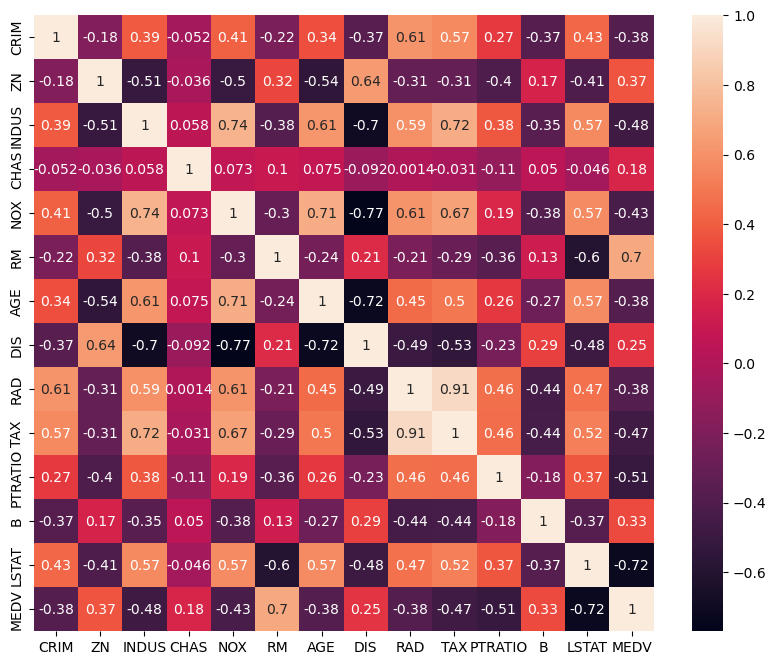

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(),annot=True )

## From the above heatmap we can figure out that the rm has strong positive correlation with medv(the avg price)

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [19]:
df[['RM','MEDV' ]].describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


## From the above we can say that there is no need of normalization

In [20]:
df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040526,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.303130,0.389618
std,0.096052,0.229211,0.245571,0.250233,0.238431,0.134627,0.282590,0.191482,0.378576,0.321636,0.230313,0.230205,0.193508,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000865,0.000000,0.173387,0.000000,0.131687,0.445392,0.443100,0.088259,0.130435,0.175573,0.510638,0.945730,0.151766,0.267222
50%,0.003191,0.000000,0.346041,0.000000,0.314815,0.507281,0.736869,0.188949,0.173913,0.272901,0.686170,0.986232,0.283251,0.360000
75%,0.040526,0.112119,0.646628,0.000000,0.491770,0.586798,0.933831,0.369088,1.000000,0.914122,0.808511,0.998298,0.409492,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


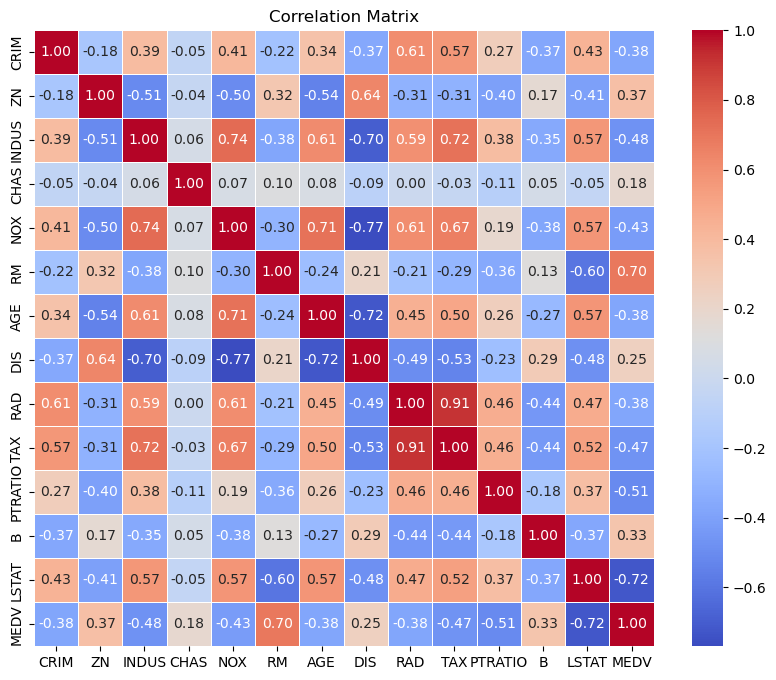

In [22]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## From the above it can be noted that following have a positive and negative correlation with respect to medv
## Positive : ZN,CHAS,RM,DIS,B
## Negative : CRIM,INDUS,NOX,AGE,RAD,TAX,PTRATIO,,LSTAT

<AxesSubplot:xlabel='MEDV'>

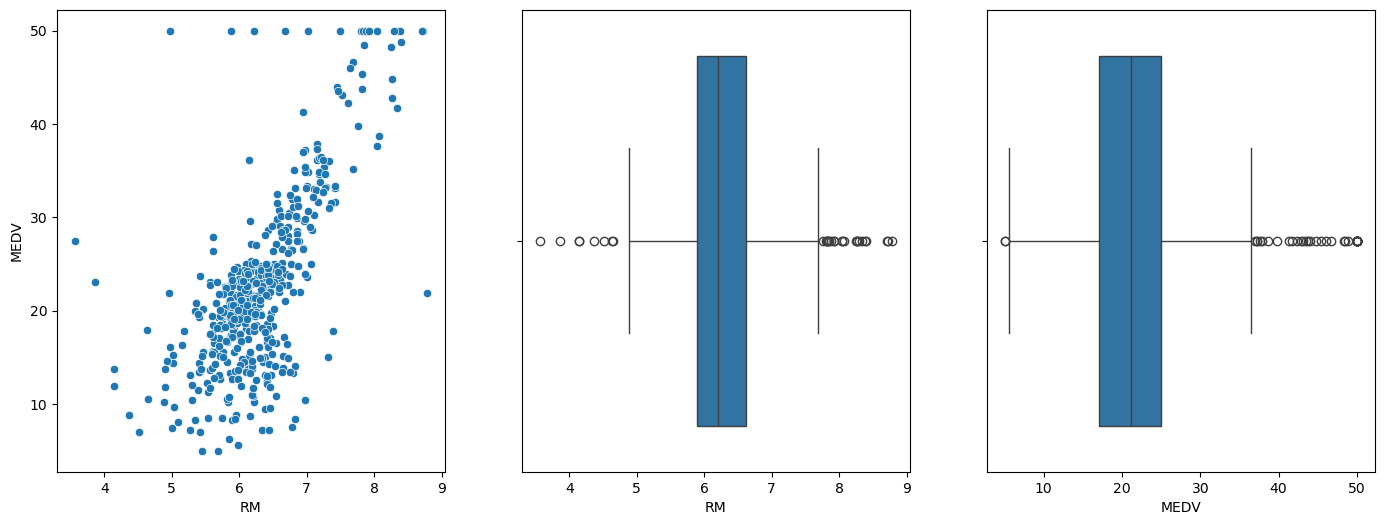

In [24]:
fig, axes = plt.subplots(1,3,figsize=(17,6))
sns.scatterplot(data = df, x = 'RM', y = 'MEDV', ax=axes[0])
sns.boxplot(data = df, x= 'RM',ax=axes[1])
sns.boxplot(data = df, x= 'MEDV',ax=axes[2])

In [26]:
def remove_outliers(df, col_name):
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col_name] >lower_bound) & (df[col_name] < upper_bound)][col_name]

clipped_rm = remove_outliers(df,'RM')
clipped_medv = remove_outliers(df,'M')
# Not preferred to remove outliers

In [27]:
print(clipped_medv.describe())
clipped_rm.describe()

count    466.000000
mean      20.719099
std        6.451416
min        5.600000
25%       16.500000
50%       20.600000
75%       24.075000
max       36.500000
Name: MEDV, dtype: float64


count    476.000000
mean       6.233212
std        0.533578
min        4.880000
25%        5.886500
50%        6.183500
75%        6.553000
max        7.691000
Name: RM, dtype: float64

<AxesSubplot:xlabel='MEDV'>

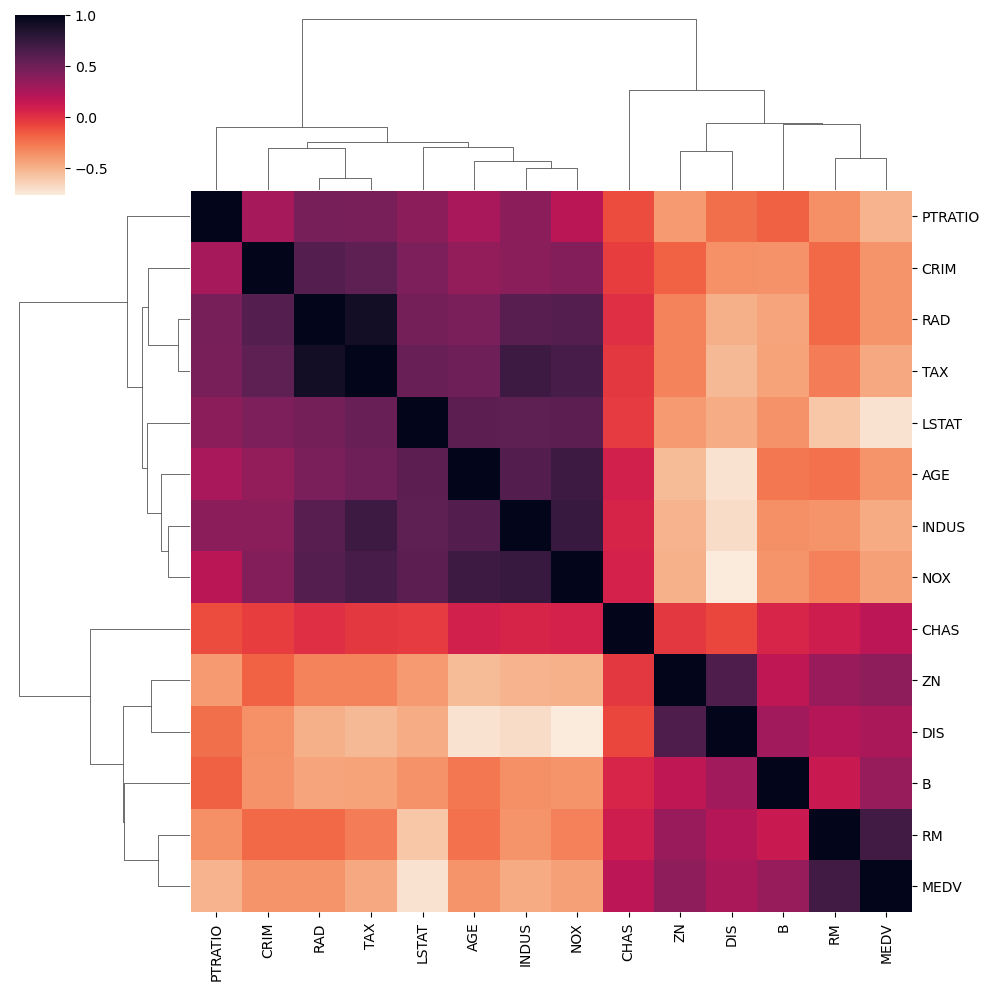

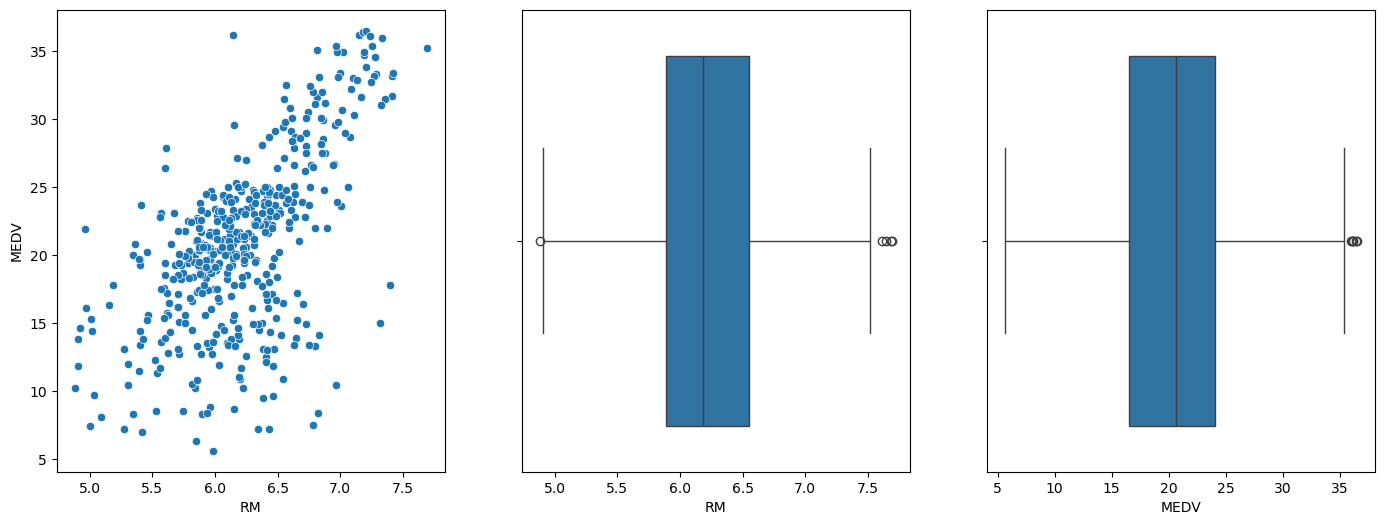

In [28]:
sns.clustermap(df.corr(), cmap='rocket_r')
fig, axes = plt.subplots(1,3,figsize=(17,6))
sns.scatterplot(x = clipped_rm, y = clipped_medv, ax=axes[0])
sns.boxplot( x= clipped_rm,ax=axes[1])
sns.boxplot( x= clipped_medv,ax=axes[2])

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

In [31]:
rm_arr = np.array(df['RM'].values)
medv_arr = np.array(df['MEDV'].values)
rm_arr = np.reshape(rm_arr, newshape=(-1,1))
medv_arr = np.reshape(medv_arr, newshape=(-1,1))

In [32]:
x_train,x_test,y_train,y_test = train_test_split(rm_arr, medv_arr, train_size=0.9, random_state=0)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

<AxesSubplot:xlabel='RM'>

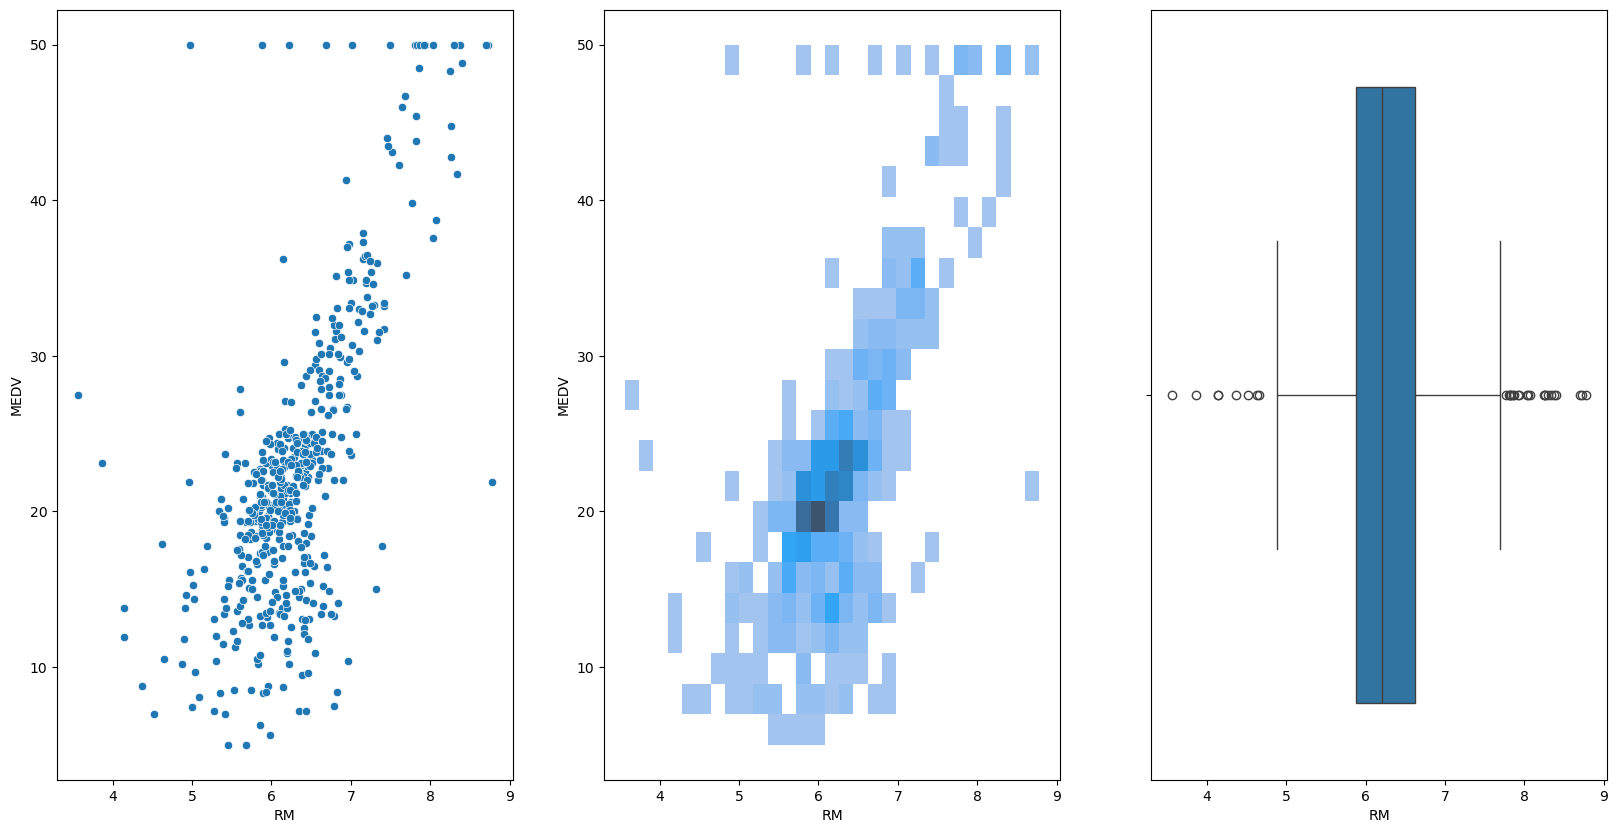

In [33]:
ig,axes = plt.subplots(1,3,figsize=(20,10))
sns.scatterplot(data = df, x = 'RM', y = 'MEDV',ax=axes[0])
sns.histplot(data = df, x = 'RM', y = 'MEDV',ax=axes[1])
sns.boxplot(data = df, x = 'RM',ax=axes[2])

In [34]:
    
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(y_pred=predictions, y_true=y_test)
acc

67.948411197987

In [35]:
mean_val = y_train.mean()

s_sq_total = 0
for i in predictions:
    s_sq_total += (mean_val-i)**2
print(f"SST : {s_sq_total}")

n  =len(df)
mean_squared_err = s_sq_total/(n-1)
print(f"MSE : {mean_squared_err}")

mean_abs_error = 0
for i in range(len(y_test)):
    mean_abs_error += abs(predictions[i] - y_test[i])
mean_abs_error /= n

sse = 0
for i in range(len(y_test)):
    sse += (predictions[i] - y_test[i])**2
print(f"sse : {sse}")

print(f"MAE : {mean_abs_error}")

SST : [2163.57936554]
MSE : [4.28431558]
sse : [3465.3689711]
MAE : [0.48651421]


In [39]:
all_predictions = model.predict(rm_arr)
mean_val = np.mean(medv_arr)
n = len(medv_arr)

sum_sq_res = np.sum((all_predictions - medv_arr) ** 2)
sum_sq_total = np.sum((medv_arr - mean_val) ** 2)

R2_score = 1 - (sum_sq_res / sum_sq_total)
print(f"R2 score : {R2_score}")

R2 score : 0.483119922597407


In [40]:
from sklearn.metrics import r2_score
# Assuming 'y_true' contains the actual values and 'y_pred' contains the predicted values
r2_value = r2_score(medv_arr, all_predictions)
print(f"R2 score: {r2_value}")

R2 score: 0.483119922597407


In [42]:
X = np.column_stack((df['CHAS'], df['RM']))
y = medv_arr

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X)
acc2 = mean_squared_error(y_pred=y_pred, y_true=medv_arr)
r2_value = r2_score(medv_arr, y_pred)
print(r2_value)
print(acc2)

Coefficients: [[4.03958263 8.95495574]]
Intercept: [-34.02842097]
0.495478897834415
42.59144751623814
